In [1]:
# libs 
import pandas as pd 
import numpy as np 

In [2]:
train = pd.read_csv('../ML-DL Datasets/train.csv')
test = pd.read_csv('../ML-DL Datasets/test.csv')
train.head()

,user_id,industry,location,moved_after_2019,ITU,YTU,anadolu_üniversitesi,diğer_school,ege_üniversitesi,hacettepe_üniversitesi,...,Software Development,Software Engineering,Spring Framework,Teamwork,Visual Studio,Web Development,XML,jQuery,other,skill_count
0,1301,Information Technology,istanbul,1,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0
1,6950,Information Technology,istanbul,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,49.0
2,4880,Others,diğer,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,21.0
3,26046,Information Technology,istanbul,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
4,11005,Financial Services,istanbul,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0


In [3]:
spec_cols = ['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count', 'moved_after_2019', 'industry', 'location']
train[spec_cols].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count,moved_after_2019,industry,location
0,2.0,92.0,4.0,2.0,23.0,1,Information Technology,istanbul
1,1.0,117.0,6.0,3.0,49.0,0,Information Technology,istanbul
2,2.0,108.0,4.0,0.0,21.0,0,Others,diğer
3,3.0,160.0,4.0,1.0,30.0,0,Information Technology,istanbul
4,2.0,160.0,3.0,2.0,48.0,0,Financial Services,istanbul


In [4]:
# scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [5]:
train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']] = sc.fit_transform(train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']])
train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count
0,-0.132132,-0.147686,0.487529,0.696960,0.140200
1,-1.002056,0.208104,1.384526,1.516626,2.018894
2,-0.132132,0.080019,0.487529,-0.942370,-0.004315
3,0.737792,0.820063,0.487529,-0.122705,0.646002
4,-0.132132,0.820063,0.039031,0.696960,1.946637


In [6]:
# label encoder
from sklearn.preprocessing import LabelEncoder
industry_le = LabelEncoder()
location_le = LabelEncoder()

In [7]:
train['industry'] = industry_le.fit_transform(train['industry'])
train['location'] = location_le.fit_transform(train['location'])
train[['industry', 'location']].head()

,industry,location
0,11,8
1,11,8
2,16,5
3,11,8
4,8,8


In [8]:
train[spec_cols].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count,moved_after_2019,industry,location
0,-0.132132,-0.147686,0.487529,0.696960,0.140200,1,11,8
1,-1.002056,0.208104,1.384526,1.516626,2.018894,0,11,8
2,-0.132132,0.080019,0.487529,-0.942370,-0.004315,0,16,5
3,0.737792,0.820063,0.487529,-0.122705,0.646002,0,11,8
4,-0.132132,0.820063,0.039031,0.696960,1.946637,0,8,8


In [9]:
train['moved_after_2019'].value_counts()

0    32496
1    20523
Name: moved_after_2019, dtype: int64

Hedef değişken dengesiz dağılıma sahip `AĞIRLIKLANDIRMA` ihtiyacı duyacak!

In [10]:
class_weight = {0:2, 1:3}

In [11]:
train = train.drop(['user_id'], axis=1)
X = train.drop(['moved_after_2019'], axis=1)
y = train[['moved_after_2019']]

In [12]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)

### Modeller:

1. Lojistik Regresyon

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight=class_weight, max_iter=1000)
lr.fit(X_train, np.ravel(y_train))
logistic_predictions = lr.predict(X_test)

2. Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train, np.ravel(y_train))
randomf_predictions = rf.predict(X_test)

3. Gradient Boosting Trees

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier()
gbt.fit(X_train, np.ravel(y_train), sample_weight=[class_weight[y] for y in np.ravel(y_train)])
gbt_predictions = gbt.predict(X_test)

4. Models That Use Bayes Therom

`BernoulliNB` features arasındaki ilişkiyi önemsemez ve binary kodlanmış verilerle çok iyi çalışır. Ancak özellikler arası ilişkiyi ihmal eder.  

`CategoricalNB` ve `MultinomalNB` negatif değer bulunmayan veri setiyle çalışır. Bizim 5 adet standartlaştırılmış sütunum olduğundan bu sütunları atmak istemediğimizden kullanmadık.  

`GaussianNB` ise normal dağılım gösteren veri setleriyle çalışır.

In [16]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(class_prior=[0.4, 0.6])
bnb.fit(X_train, np.ravel(y_train))
bnb_predictions = bnb.predict(X_test)

``GaussianNB`` modeli, sınıf ağırlıklarını doğrudan kabul etmez. Bunun nedeni, GaussianNB'nin sınıf olasılıklarını hesaplamak için normal dağılımı kullanmasıdır.   

Bu nedenle, sınıf ağırlıklarının etkisini doğrudan ifade etmek için sınıf ağırlıklarını kullanamayız. Bunun yerine, sınıf ağırlıklarımızı modelin eğitim örneklerinin oranına göre ayarlamak ve modeli normal olarak eğitmek en iyi yaklaşım olacaktır.

**SMOTE (Synthetic Minority Over-sampling Technique):**  

SMOTE, azınlık sınıfındaki örneklerin kopyalarını çıkararak sentetik örnekler oluşturur ve böylece veri kümesindeki azınlık sınıfının örnek sayısını artırır.

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_smote, np.ravel(y_train_smote))
gnb_predictions = gnb.predict(X_test)

5. SVM (Support Vector Machines)

In [19]:
from sklearn.svm import SVC
svc = SVC(class_weight=class_weight)
svc.fit(X_train, np.ravel(y_train))
svc_predictions = svc.predict(X_test)

<hr>

### Tahmin Sonuçlarının Değerlendirilmesi:

In [41]:
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# plotting
import matplotlib.pyplot as plt

1. Logistic Regression Accuracy

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, logistic_predictions)
auc = roc_auc_score(y_test, logistic_predictions)
pd.DataFrame(classification_report(y_test, logistic_predictions, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.783398,0.626436,0.718446,0.704917,0.722780
recall,0.748156,0.671225,0.718446,0.709691,0.718446
f1-score,0.765372,0.648057,0.718446,0.706714,0.720066
support,8136.000000,5119.000000,0.718446,13255.000000,13255.000000


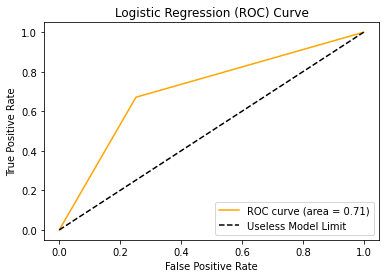

In [98]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/Logistic_Regression_ROC.png')
plt.show()

2. Random Forest Accuracy

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, randomf_predictions)
auc = roc_auc_score(y_test, randomf_predictions)
pd.DataFrame(classification_report(y_test, gbt_predictions, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.861366,0.709711,0.795624,0.785539,0.802798
recall,0.794985,0.796640,0.795624,0.795813,0.795624
f1-score,0.826846,0.750667,0.795624,0.788756,0.797426
support,8136.000000,5119.000000,0.795624,13255.000000,13255.000000


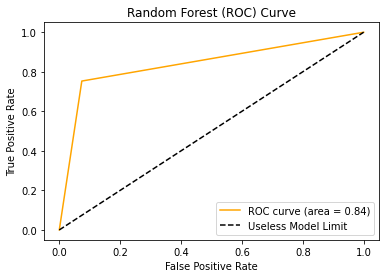

In [85]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/Random_Forest_ROC.png')
plt.show()

3. Gradient Boosting Trees Accuracy

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, gbt_predictions)
auc = roc_auc_score(y_test, gbt_predictions)
pd.DataFrame(classification_report(y_test, gbt_predictions, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.861366,0.709711,0.795624,0.785539,0.802798
recall,0.794985,0.796640,0.795624,0.795813,0.795624
f1-score,0.826846,0.750667,0.795624,0.788756,0.797426
support,8136.000000,5119.000000,0.795624,13255.000000,13255.000000


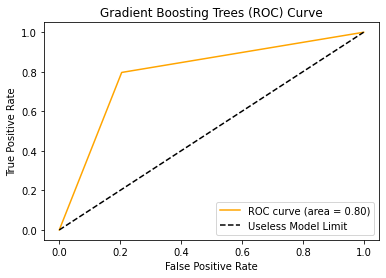

In [88]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Trees (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/Gradient_Boosting_Trees_ROC.png')
plt.show()

4. GaussianNB & BernoulliNB Accuracy

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, bnb_predictions)
auc = roc_auc_score(y_test, bnb_predictions)
print("BernoulliNB:")
pd.DataFrame(classification_report(y_test, bnb_predictions, output_dict=True))

BernoulliNB:


,0,1,accuracy,macro avg,weighted avg
precision,0.737971,0.492372,0.605583,0.615171,0.643122
recall,0.554204,0.687244,0.605583,0.620724,0.605583
f1-score,0.633020,0.573712,0.605583,0.603366,0.610115
support,8136.000000,5119.000000,0.605583,13255.000000,13255.000000


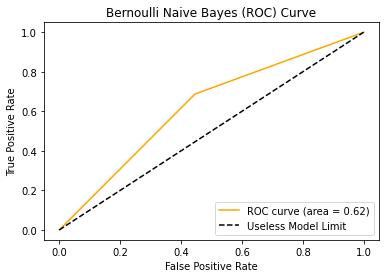

In [94]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bernoulli Naive Bayes (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/BernoulliNB_ROC.png')
plt.show()

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, gnb_predictions)
auc = roc_auc_score(y_test, gnb_predictions)
print("BernoulliNB:")
pd.DataFrame(classification_report(y_test, gnb_predictions, output_dict=True))

BernoulliNB:


,0,1,accuracy,macro avg,weighted avg
precision,0.716978,0.503630,0.617201,0.610304,0.634584
recall,0.621804,0.609885,0.617201,0.615845,0.617201
f1-score,0.666008,0.551688,0.617201,0.608848,0.621858
support,8136.000000,5119.000000,0.617201,13255.000000,13255.000000


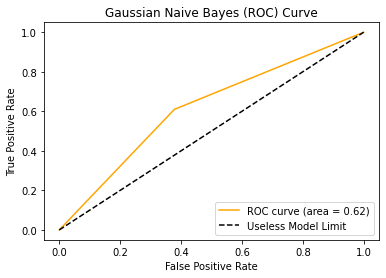

In [96]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/GaussianNB_ROC.png')
plt.show()

5. Support Vector Machines Accuracy

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, svc_predictions)
auc = roc_auc_score(y_test, svc_predictions)
print("BernoulliNB:")
pd.DataFrame(classification_report(y_test, svc_predictions, output_dict=True))

BernoulliNB:


,0,1,accuracy,macro avg,weighted avg
precision,0.820267,0.648015,0.744323,0.734141,0.753744
recall,0.747173,0.739793,0.744323,0.743483,0.744323
f1-score,0.782016,0.690869,0.744323,0.736443,0.746816
support,8136.000000,5119.000000,0.744323,13255.000000,13255.000000


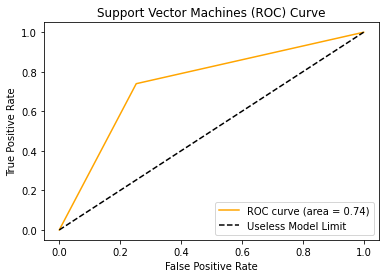

In [101]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machines (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/SVM.png')
plt.show()

<hr>